In [1]:
from dotenv import load_dotenv

load_dotenv('../../.env', override=True)

True

In [3]:
from sqlalchemy import create_engine
import os

host = os.getenv("HOST")
port = os.getenv("PORT")
# database = os.getenv("DBNAME")
database = "anr"
user = os.getenv("USER")
password = os.getenv("PASSWD")


In [5]:

engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")

In [6]:
import pandas as pd

anr_prog_con = pd.read_sql_table(table_name="conectividad_aprob_georef", con=engine)

In [7]:
anr_prog_con.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
anr_prog_con.columns

Index(['acta', 'tipo', 'exp', 'razon_social', 'cuit', 'programa', 'monto',
       'lugar', 'file', 'acta_nro', 'prog_original', 'acta_file', 'fecha',
       'provincia', 'localidad', 'departamento', 'id', 'localidad_indec',
       'departamento_indec', 'provincia_indec', 'lat', 'lon'],
      dtype='object')

In [10]:
anr_prog_con.head()

,acta,tipo,exp,razon_social,cuit,programa,monto,lugar,file,acta_nro,...,fecha,provincia,localidad,departamento,id,localidad_indec,departamento_indec,provincia_indec,lat,lon
0,EX-2019-45180205-APN-DNFYD#ENACOM: Aprobar el ...,Aprobar el proyecto,EX-2019-45180205-APN-DNFYD#ENACOM,SEBE CABLE SOCIEDAD DE RESPONSABILIDAD LIMITADA,3.064501e+10,PROGRAMA CONECTIVIDAD,2261577.0,"Localidad de Juan A. Pradere, departamento de ...",aprobados_acta_56.csv,Acta 56,...,enero 2020,Buenos Aires,Juan A Pradere,Patagones,06602050000,JUAN A. PRADERE,Patagones,Buenos Aires,-39.599380,-62.651047
1,EX-2019-57002814-APN-DNFYD#ENACOM: Aprobar el ...,Aprobar el proyecto,EX-2019-57002814-APN-DNFYD#ENACOM,VIDEO CABLE TOTAL S.A.,3.070783e+10,PROGRAMA CONECTIVIDAD,9874019.0,"Localidad de Teodelina, departamento de Genera...",aprobados_acta_56.csv,Acta 56,...,enero 2020,Santa Fe,Teodelina,General Lopez,82042280000,TEODELINA,General López,Santa Fe,-34.191613,-61.527226
2,EX-2019-88343739-APN-DNFYD#ENACOM: Aprobar el ...,Aprobar el proyecto,EX-2019-88343739-APN-DNFYD#ENACOM,COOPERATIVA DE SERVICIOS PÚBLICOS DEL CAMPILLO...,3.054579e+10,PROGRAMA CONECTIVIDAD,8848620.0,"Localidad de Del Campillo, del departamento de...",aprobados_acta_56.csv,Acta 56,...,enero 2020,Córdoba,Del Campillo,Gral Roca,14035010000,DEL CAMPILLO,General Roca,Córdoba,-34.376085,-64.494540
3,EX-2019-81016814-APN-DNFYD#ENACOM: Aprobar el ...,Aprobar el proyecto,EX-2019-81016814-APN-DNFYD#ENACOM,COOPERATIVA DE OBRAS Y SERVICIOS PÚBLICOS MONJ...,3.056536e+10,PROGRAMA CONECTIVIDAD,2661583.0,"Localidad de Monje, departamento de San Jeróni...",aprobados_acta_56.csv,Acta 56,...,enero 2020,Santa Fe,Monje,San Jerónimo,82105200000,MONJE,San Jerónimo,Santa Fe,-32.358736,-60.942904
4,EX-2019-77479546-APN-DNFYD#ENACOM: Aprobar el ...,Aprobar el proyecto,EX-2019-77479546-APN-DNFYD#ENACOM,TELE IMAGEN PRIVADA S.A.,3.070886e+10,PROGRAMA CONECTIVIDAD,5218974.0,"Localidad de Villa Ascasubi, departamento de T...",aprobados_acta_56.csv,Acta 56,...,enero 2020,Córdoba,Villa Ascasubi,Tercero Arriba,14161170000,VILLA ASCASUBI,Tercero Arriba,Córdoba,-32.164358,-63.892559


In [11]:
anr_prog_con_simple = anr_prog_con[['fecha', 'id']]

In [20]:
anr_prog_con_simple.loc[anr_prog_con_simple['fecha']=='junio', 'fecha'] = 'junio 2022' 

In [21]:
meses = {'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04', 'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08', 'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12'}

anr_prog_con_simple['mes'] = anr_prog_con_simple['fecha'].apply(lambda x: x.split(' ')[0])
anr_prog_con_simple['mes'] = anr_prog_con_simple['mes'].map(meses)
anr_prog_con_simple['anio'] = anr_prog_con_simple['fecha'].apply(lambda x: x.split(' ')[1])
anr_prog_con_simple['fecha_alt'] = anr_prog_con_simple['anio'] + '-' + anr_prog_con_simple['mes'] + '-01'
anr_prog_con_simple['fecha_alt'] = pd.to_datetime(anr_prog_con_simple['fecha_alt'])



/var/folders/_7/80b7r22d48j6n3m0r4vsgvdm0000gn/T/ipykernel_58503/2779528713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anr_prog_con_simple['mes'] = anr_prog_con_simple['fecha'].apply(lambda x: x.split(' ')[0])
/var/folders/_7/80b7r22d48j6n3m0r4vsgvdm0000gn/T/ipykernel_58503/2779528713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anr_prog_con_simple['mes'] = anr_prog_con_simple['mes'].map(meses)
/var/folders/_7/80b7r22d48j6n3m0r4vsgvdm0000gn/T/ipykernel_58503/2779528713.py:5: SettingWithCopyW

In [17]:
anr_prog_con_simple['fecha'].unique()

array(['enero 2020', 'julio 2020', 'febrero 2020', 'abril 2020',
       'mayo 2020', 'agosto 2020', 'octubre 2020', 'noviembre 2020',
       'febrero 2021', 'abril 2021', 'junio 2021', 'agosto 2021',
       'octubre 2021', 'noviembre 2021', 'diciembre 2021', 'febrero 2022',
       'mayo 2022', 'junio', 'agosto 2022', 'septiembre 2022',
       'noviembre 2022', 'diciembre 2022', 'marzo 2023', 'abril 2022',
       'mayo 2023', 'junio 2023', 'agosto 2023', 'octubre 2023',
       'noviembre 2023'], dtype=object)

In [19]:
anr_prog_con.loc[anr_prog_con['fecha']=='junio', 'acta_file']

100    Acta 79 - junio.pdf
101    Acta 79 - junio.pdf
102    Acta 79 - junio.pdf
103    Acta 79 - junio.pdf
104    Acta 79 - junio.pdf
Name: acta_file, dtype: object

In [33]:
anr_prog_con_simple['link'] = anr_prog_con_simple['id'].apply(lambda x: x[:-3] if x is not None else None)

/var/folders/_7/80b7r22d48j6n3m0r4vsgvdm0000gn/T/ipykernel_58503/2617043581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anr_prog_con_simple['link'] = anr_prog_con_simple['id'].apply(lambda x: x[:-3] if x is not None else None)


In [34]:
anr_prog_con_simple.head()

,fecha,id,mes,anio,fecha_alt,link
0,enero 2020,06602050000,01,2020,2020-01-01,06602050
1,enero 2020,82042280000,01,2020,2020-01-01,82042280
2,enero 2020,14035010000,01,2020,2020-01-01,14035010
3,enero 2020,82105200000,01,2020,2020-01-01,82105200
4,enero 2020,14161170000,01,2020,2020-01-01,14161170


In [35]:
anr_prog_con_simple_lag = anr_prog_con_simple.loc[anr_prog_con_simple['fecha_alt'] < '2023-01-01']

In [36]:
anr_prog_con_simple.shape, anr_prog_con_simple_lag.shape

((594, 6), (515, 6))

In [27]:
database2 = "conectividad_localidad"
engine2 = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database2}")

con_loc = pd.read_sql_table(table_name="con_loc", con=engine2)

/Users/martinolmos/Documents/py_projects/data_tic/lib/python3.11/site-packages/pandas/io/sql.py:1725: SAWarning: Did not recognize type 'geometry' of column 'geometry'
  self.meta.reflect(bind=self.con, only=[table_name], views=True)


In [28]:
con_loc.columns

Index(['link', 'codpcia', 'coddpto', 'codloc', 'codpciadpto', 'provincia',
       'departamento', 'localidad', 'personas', 'hogares', 'geometry',
       'cambio', 'personas2022', 'hogares_act', 'accesos', 'otros', 'vmd',
       'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL',
       'WIMAX', 'WIRELESS', '3G', '4G', 'pen_pob', 'pen_hog'],
      dtype='object')

In [29]:
con_loc_simple = con_loc[['link', 'personas', 'pen_pob', 'vmd']]

In [52]:
con_loc_simple_anr = con_loc_simple.loc[con_loc_simple['link'].isin(anr_prog_con_simple_lag['link'])]

In [53]:
con_loc_simple_elegible = con_loc_simple.loc[con_loc_simple['personas'] < 30000]

In [54]:
con_loc_simple_elegible_sin_anr = con_loc_simple_elegible.loc[~con_loc_simple_elegible['link'].isin(anr_prog_con_simple['link'])]

In [55]:
con_loc_simple.shape, con_loc_simple_elegible.shape, con_loc_simple_elegible_sin_anr.shape, con_loc_simple_anr.shape

((3527, 4), (3355, 4), (2854, 4), (465, 4))

In [56]:
con_loc_simple_elegible_sin_anr['pen_pob'].mean(), con_loc_simple_anr['pen_pob'].mean()

(27.391489894477758, 18.36155918758159)

In [57]:
con_loc_simple_elegible_sin_anr['pen_pob'].median(), con_loc_simple_anr['pen_pob'].median()

(5.510015155247972, 8.818575156059055)

In [47]:
con_loc_simple_elegible_sin_anr['personas'].mean(), con_loc_simple_anr['personas'].mean()

(2497.656271899089, 3126.0717131474103)

In [58]:
con_loc_simple_elegible_sin_anr['personas'].median(), con_loc_simple_anr['personas'].median()

(553.5, 1251.0)

<Axes: >

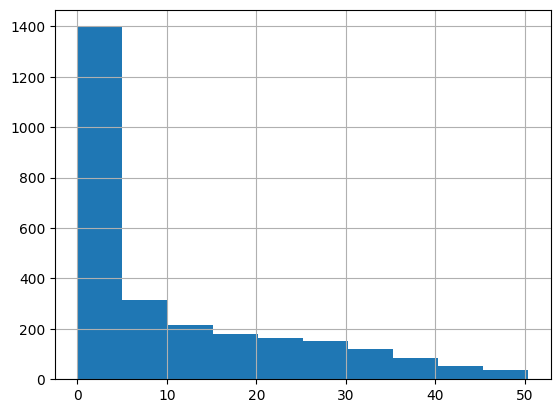

In [64]:
# Calculate the 5th and 95th percentiles
q_low = con_loc_simple_elegible_sin_anr['pen_pob'].quantile(0.05)
q_high = con_loc_simple_elegible_sin_anr['pen_pob'].quantile(0.95)

# Filter out the outliers
# filtered_data = con_loc_simple_elegible_sin_anr[(con_loc_simple_elegible_sin_anr['pen_pob'] > q_low) & (con_loc_simple_elegible_sin_anr['pen_pob'] < q_high)]
filtered_data = con_loc_simple_elegible_sin_anr[con_loc_simple_elegible_sin_anr['pen_pob'] < q_high]

# Plot the histogram of the filtered data
filtered_data['pen_pob'].hist()

<Axes: >

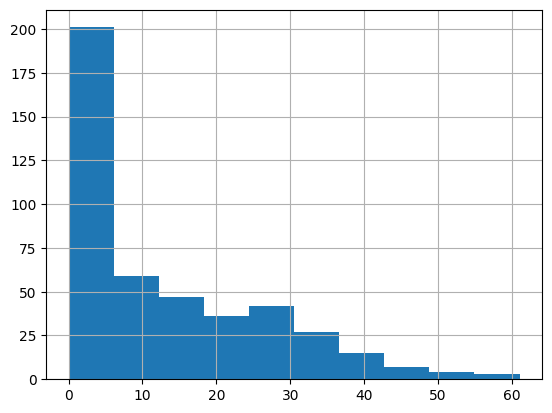

In [65]:
q_high = con_loc_simple_anr['pen_pob'].quantile(0.95)

filtered_data_anr = con_loc_simple_anr[con_loc_simple_anr['pen_pob'] < q_high]

filtered_data_anr['pen_pob'].hist()